In [6]:
import pandas as pd
import numpy as np

In [10]:
datos=pd.read_csv('/content/Social_Network_Ads.csv')

In [11]:
datos

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
datos=datos.replace({'Gender':{'Female':0,'Male':1}})

/tmp/ipython-input-12-3289703554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos=datos.replace({'Gender':{'Female':0,'Male':1}})


In [13]:
datos.sample(100)

,User ID,Gender,Age,EstimatedSalary,Purchased
130,15675185,1,31,58000,0
156,15791174,1,46,59000,0
99,15756820,0,28,37000,0
79,15655123,0,26,17000,0
290,15586757,1,39,134000,1
...,...,...,...,...,...
58,15642885,1,22,18000,0
7,15694829,0,32,150000,1
353,15750335,0,37,57000,0
358,15573926,1,40,71000,1


In [14]:
datos.drop('User ID',axis=1,inplace=True)

In [16]:
datos.sample(100)

,Gender,Age,EstimatedSalary,Purchased
28,1,29,43000,0
266,1,40,75000,0
315,0,39,75000,1
255,0,52,90000,1
120,0,36,75000,0
...,...,...,...,...
127,1,26,32000,0
29,1,31,18000,0
94,0,29,83000,0
199,1,35,22000,0


In [17]:
import matplotlib.pyplot as plt

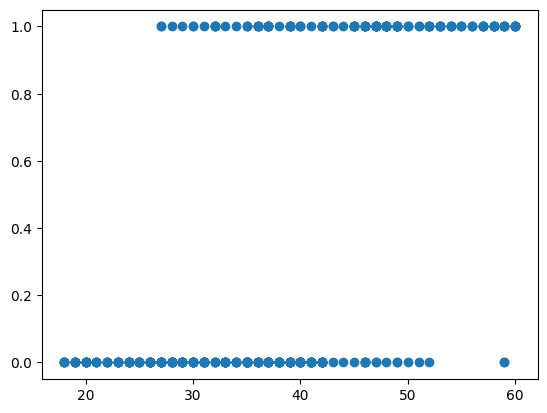

In [18]:
plt.scatter(datos['Age'],datos['Purchased'])

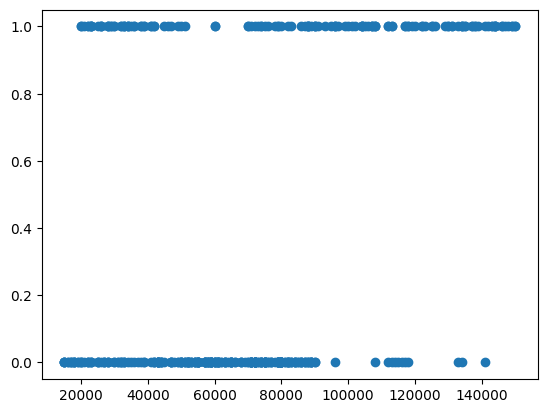

In [20]:
plt.scatter(datos['EstimatedSalary'],datos['Purchased'])

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
datos.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [25]:
X=datos[["Gender","Age","EstimatedSalary"]]
y=datos[["Purchased"]]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
clf.score(x_test,y_test)

0.8625

In [29]:
#los y predicción
y_predtest=clf.predict(x_test)

In [30]:
#matriz de confusión
from sklearn.metrics import confusion_matrix

In [39]:
mxc=confusion_matrix(y_test, y_predtest)
mxc


array([[51,  3],
       [ 8, 18]])

In [32]:
import seaborn as sns

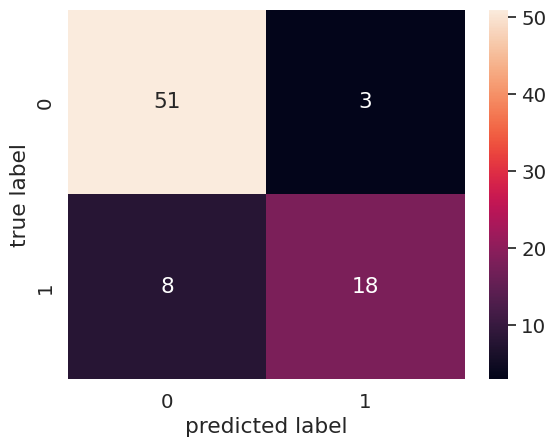

In [43]:
sns.set(font_scale=1.3) # for label size
sns.heatmap(mxc,annot=True,fmt='g')
plt.ylabel('true label')
plt.xlabel('predicted label');